In [1]:
from photometry_analysis import *

Analyzing session JOA-M-0022/20250201...
Loaded saved results for JOA-M-0022/20250201
Saved figure for JOA-M-0022/20250201 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0022\20250201\session_results_winloss.png


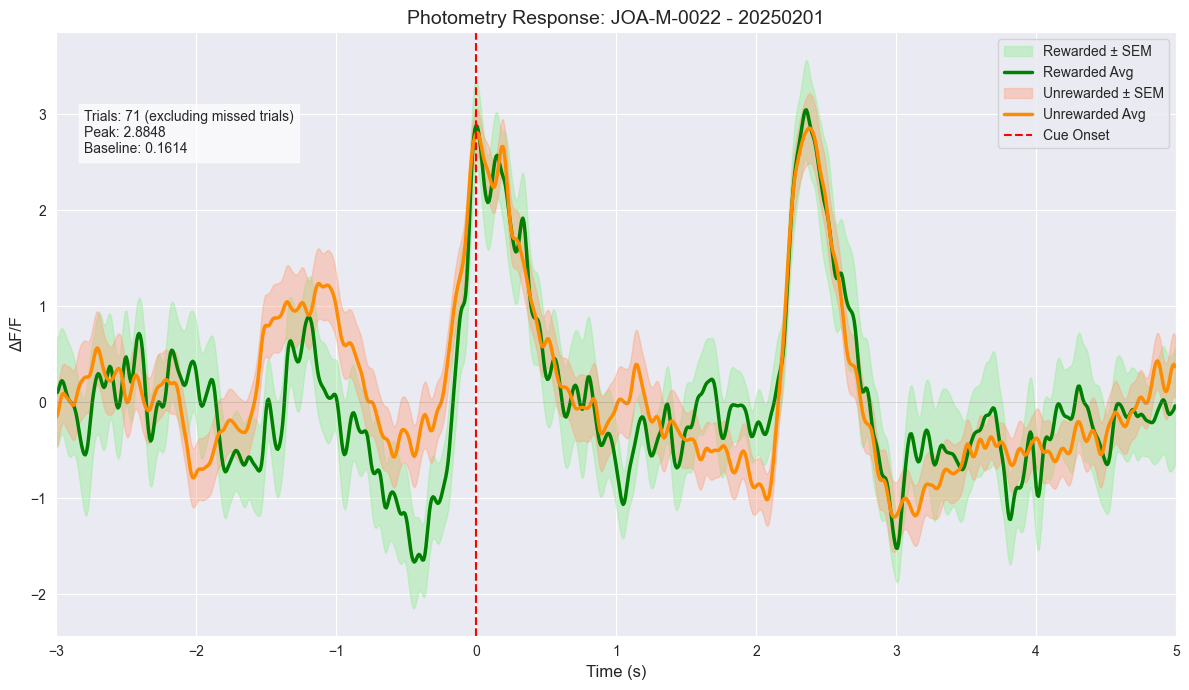

In [5]:
# Analyze a specific subject and session
session_result = analyze_specific_session("JOA-M-0022", "20250201", show_heatmap=False, win_loss=True)

Analyzing pooled results for subject JOA-M-0024...
Loaded saved pooled results for JOA-M-0024
Saved figure for JOA-M-0024/pooled to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0024\pooled\pooled_results_winloss.png


<Figure size 1200x700 with 0 Axes>

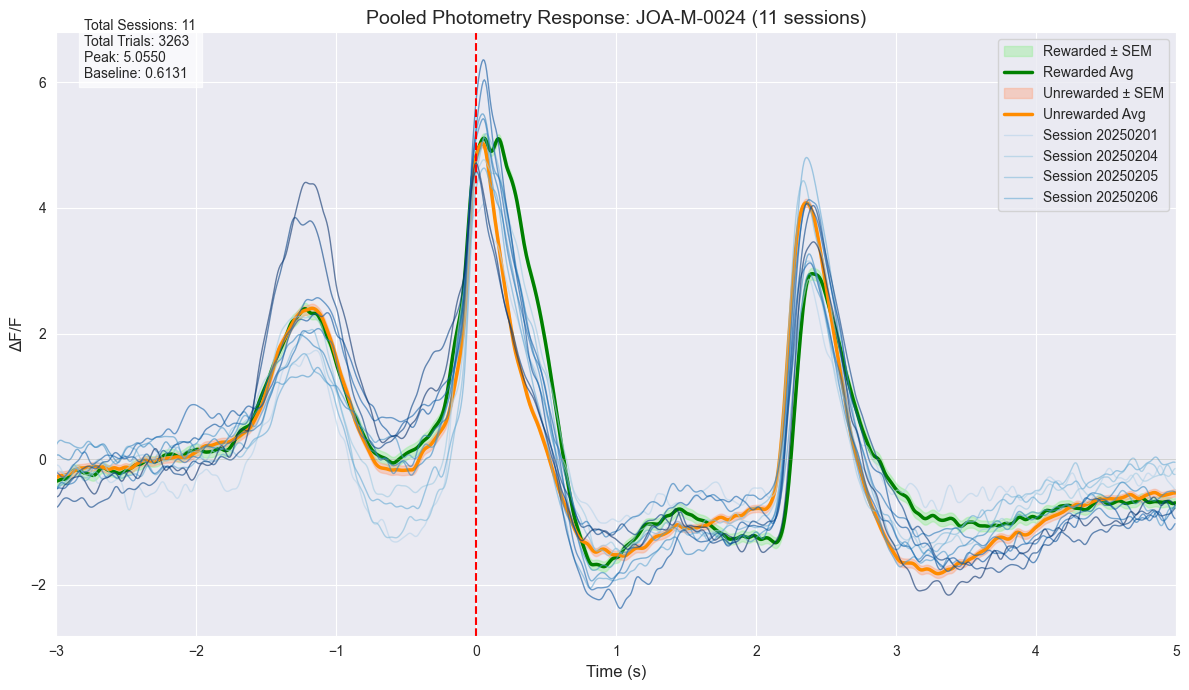

In [11]:
# Analyze all sessions for a specific subject and create pooled visualization
subject_pooled_result = pooled_results("JOA-M-0024", win_loss=True)
#22, 23, 24, 25, 26

In [ ]:
# Process all subjects and sessions
results, subject_list = all_results(win_loss=True)

In [ ]:
select_and_visualize(show_heatmap=True, win_loss=True)

Loaded saved results for JOA-M-0024/20250201
Loaded saved results for JOA-M-0024/20250204
Loaded saved results for JOA-M-0024/20250205
Loaded saved results for JOA-M-0024/20250206
Loaded saved results for JOA-M-0024/20250207
Loaded saved results for JOA-M-0024/20250208
Loaded saved results for JOA-M-0024/20250210
Loaded saved results for JOA-M-0024/20250211
Loaded saved results for JOA-M-0024/20250212
Loaded saved results for JOA-M-0024/20250214
Loaded saved results for JOA-M-0024/20250215
Saved figure for JOA-M-0024/pooled to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0024\pooled\reward_rate_quartiles_pooled.png


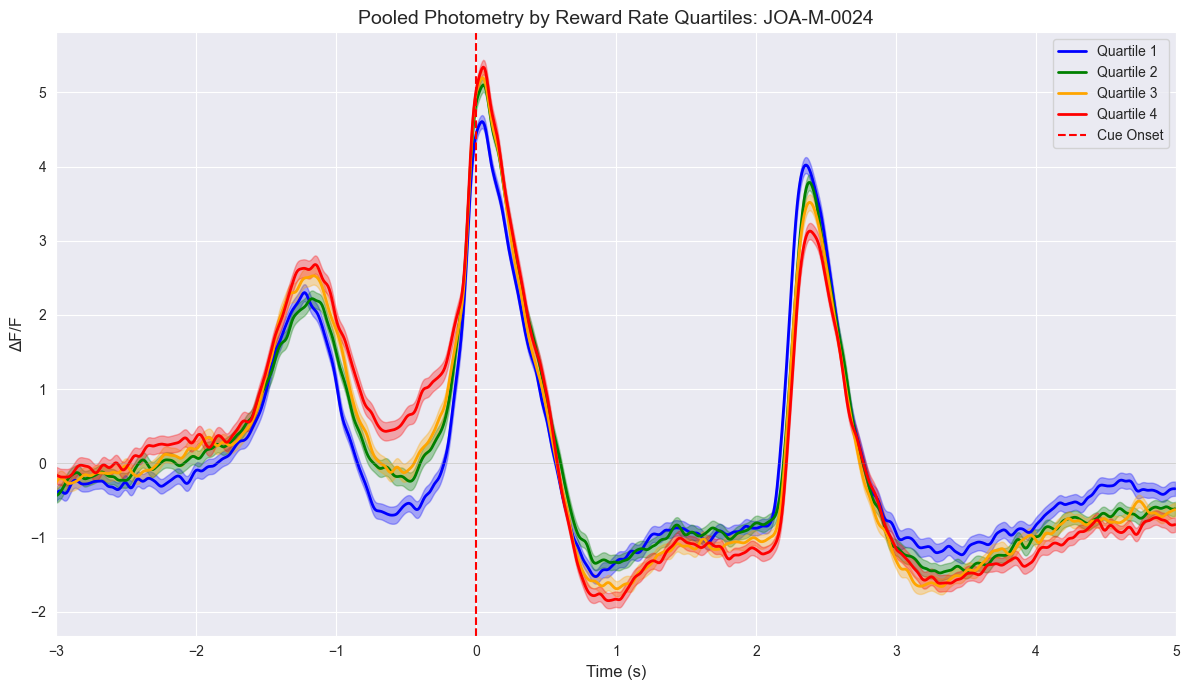

{'quartile_bins': array([1, 1, 1, ..., 0, 0, 0], shape=(3263,)),
 'reward_rates': array([0.345     , 0.370625  , 0.39625   , ..., 0.17647059, 0.20588235,
        0.20588235], shape=(3263,))}

In [7]:
analyze_reward_rate_quartiles("JOA-M-0024", win_loss=False)
#change window size to 20, then chuck 10 trials 
# for everything, chuck sessions with < 100 valid trials

Difference between rewarded and unrewarded over time (how is the gap between rewarded and unrewarded changing across sessions)

Loaded saved results for JOA-M-0024/20250201
min = 0.0
Loaded saved results for JOA-M-0024/20250204
min = 0.0
Loaded saved results for JOA-M-0024/20250205
min = 0.0
Loaded saved results for JOA-M-0024/20250206
min = 0.0
Loaded saved results for JOA-M-0024/20250207
min = 0.0
Loaded saved results for JOA-M-0024/20250208
min = 0.0
Loaded saved results for JOA-M-0024/20250210
min = 0.0
Loaded saved results for JOA-M-0024/20250211
min = 0.0
Loaded saved results for JOA-M-0024/20250212
min = 0.0
Loaded saved results for JOA-M-0024/20250214
min = 0.0
Loaded saved results for JOA-M-0024/20250215
min = 0.0
Saved figure for JOA-M-0024/win_loss_diff to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0024\win_loss_diff\win_loss_difference.png


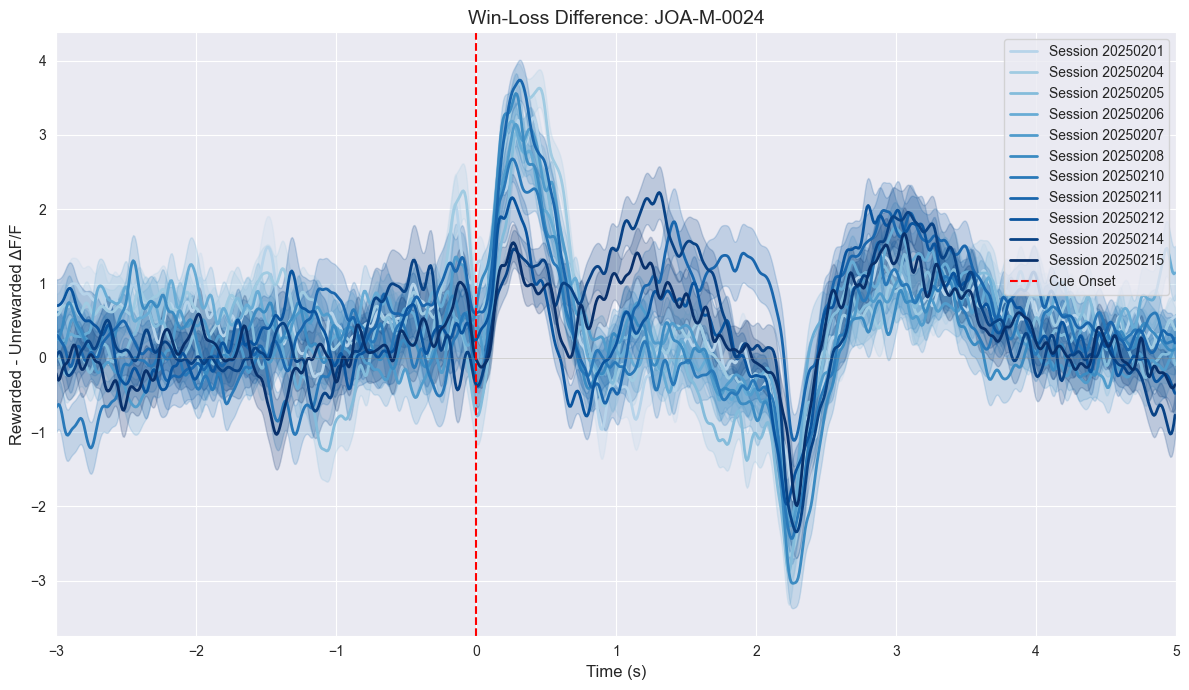

In [9]:
analyze_session_win_loss_difference_gap("JOA-M-0024") 

Trend of rewarded and unrewarded over time (how is the trend of the signal changing over time)

Loaded saved results for JOA-M-0024/20250201
Loaded saved results for JOA-M-0024/20250204
Loaded saved results for JOA-M-0024/20250205
Loaded saved results for JOA-M-0024/20250206
Loaded saved results for JOA-M-0024/20250207
Loaded saved results for JOA-M-0024/20250208
Loaded saved results for JOA-M-0024/20250210
Loaded saved results for JOA-M-0024/20250211
Loaded saved results for JOA-M-0024/20250212
Loaded saved results for JOA-M-0024/20250214
Loaded saved results for JOA-M-0024/20250215
Saved figure for JOA-M-0024/win_loss_diff to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0024\win_loss_diff\win_loss_difference.png


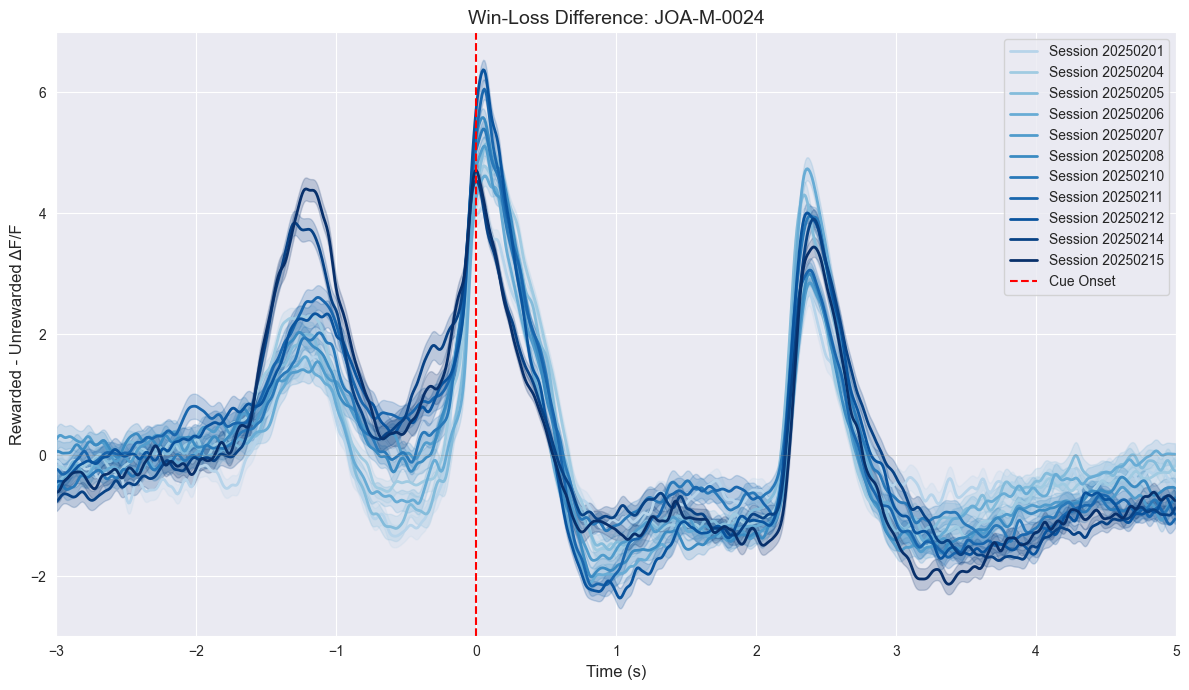

In [14]:
analyze_session_win_loss_difference_trend("JOA-M-0024")

Loaded saved results for JOA-M-0022/20250131
Loaded saved results for JOA-M-0022/20250214
Loaded saved results for JOA-M-0022/20250206
Loaded saved results for JOA-M-0022/20250201
Loaded saved results for JOA-M-0022/20250212
Loaded saved results for JOA-M-0022/20250204
Loaded saved results for JOA-M-0022/20250215
Loaded saved results for JOA-M-0022/20250207
Loaded saved results for JOA-M-0022/20250210
Loaded saved results for JOA-M-0022/20250203
Loaded saved results for JOA-M-0022/20250208
Loaded saved results for JOA-M-0022/20250131
Loaded saved results for JOA-M-0022/20250214
Loaded saved results for JOA-M-0022/20250206
Loaded saved results for JOA-M-0022/20250201
Loaded saved results for JOA-M-0022/20250212
Loaded saved results for JOA-M-0022/20250204
Loaded saved results for JOA-M-0022/20250215
Loaded saved results for JOA-M-0022/20250207
Loaded saved results for JOA-M-0022/20250210
Loaded saved results for JOA-M-0022/20250203
Loaded saved results for JOA-M-0022/20250208
Saved figu

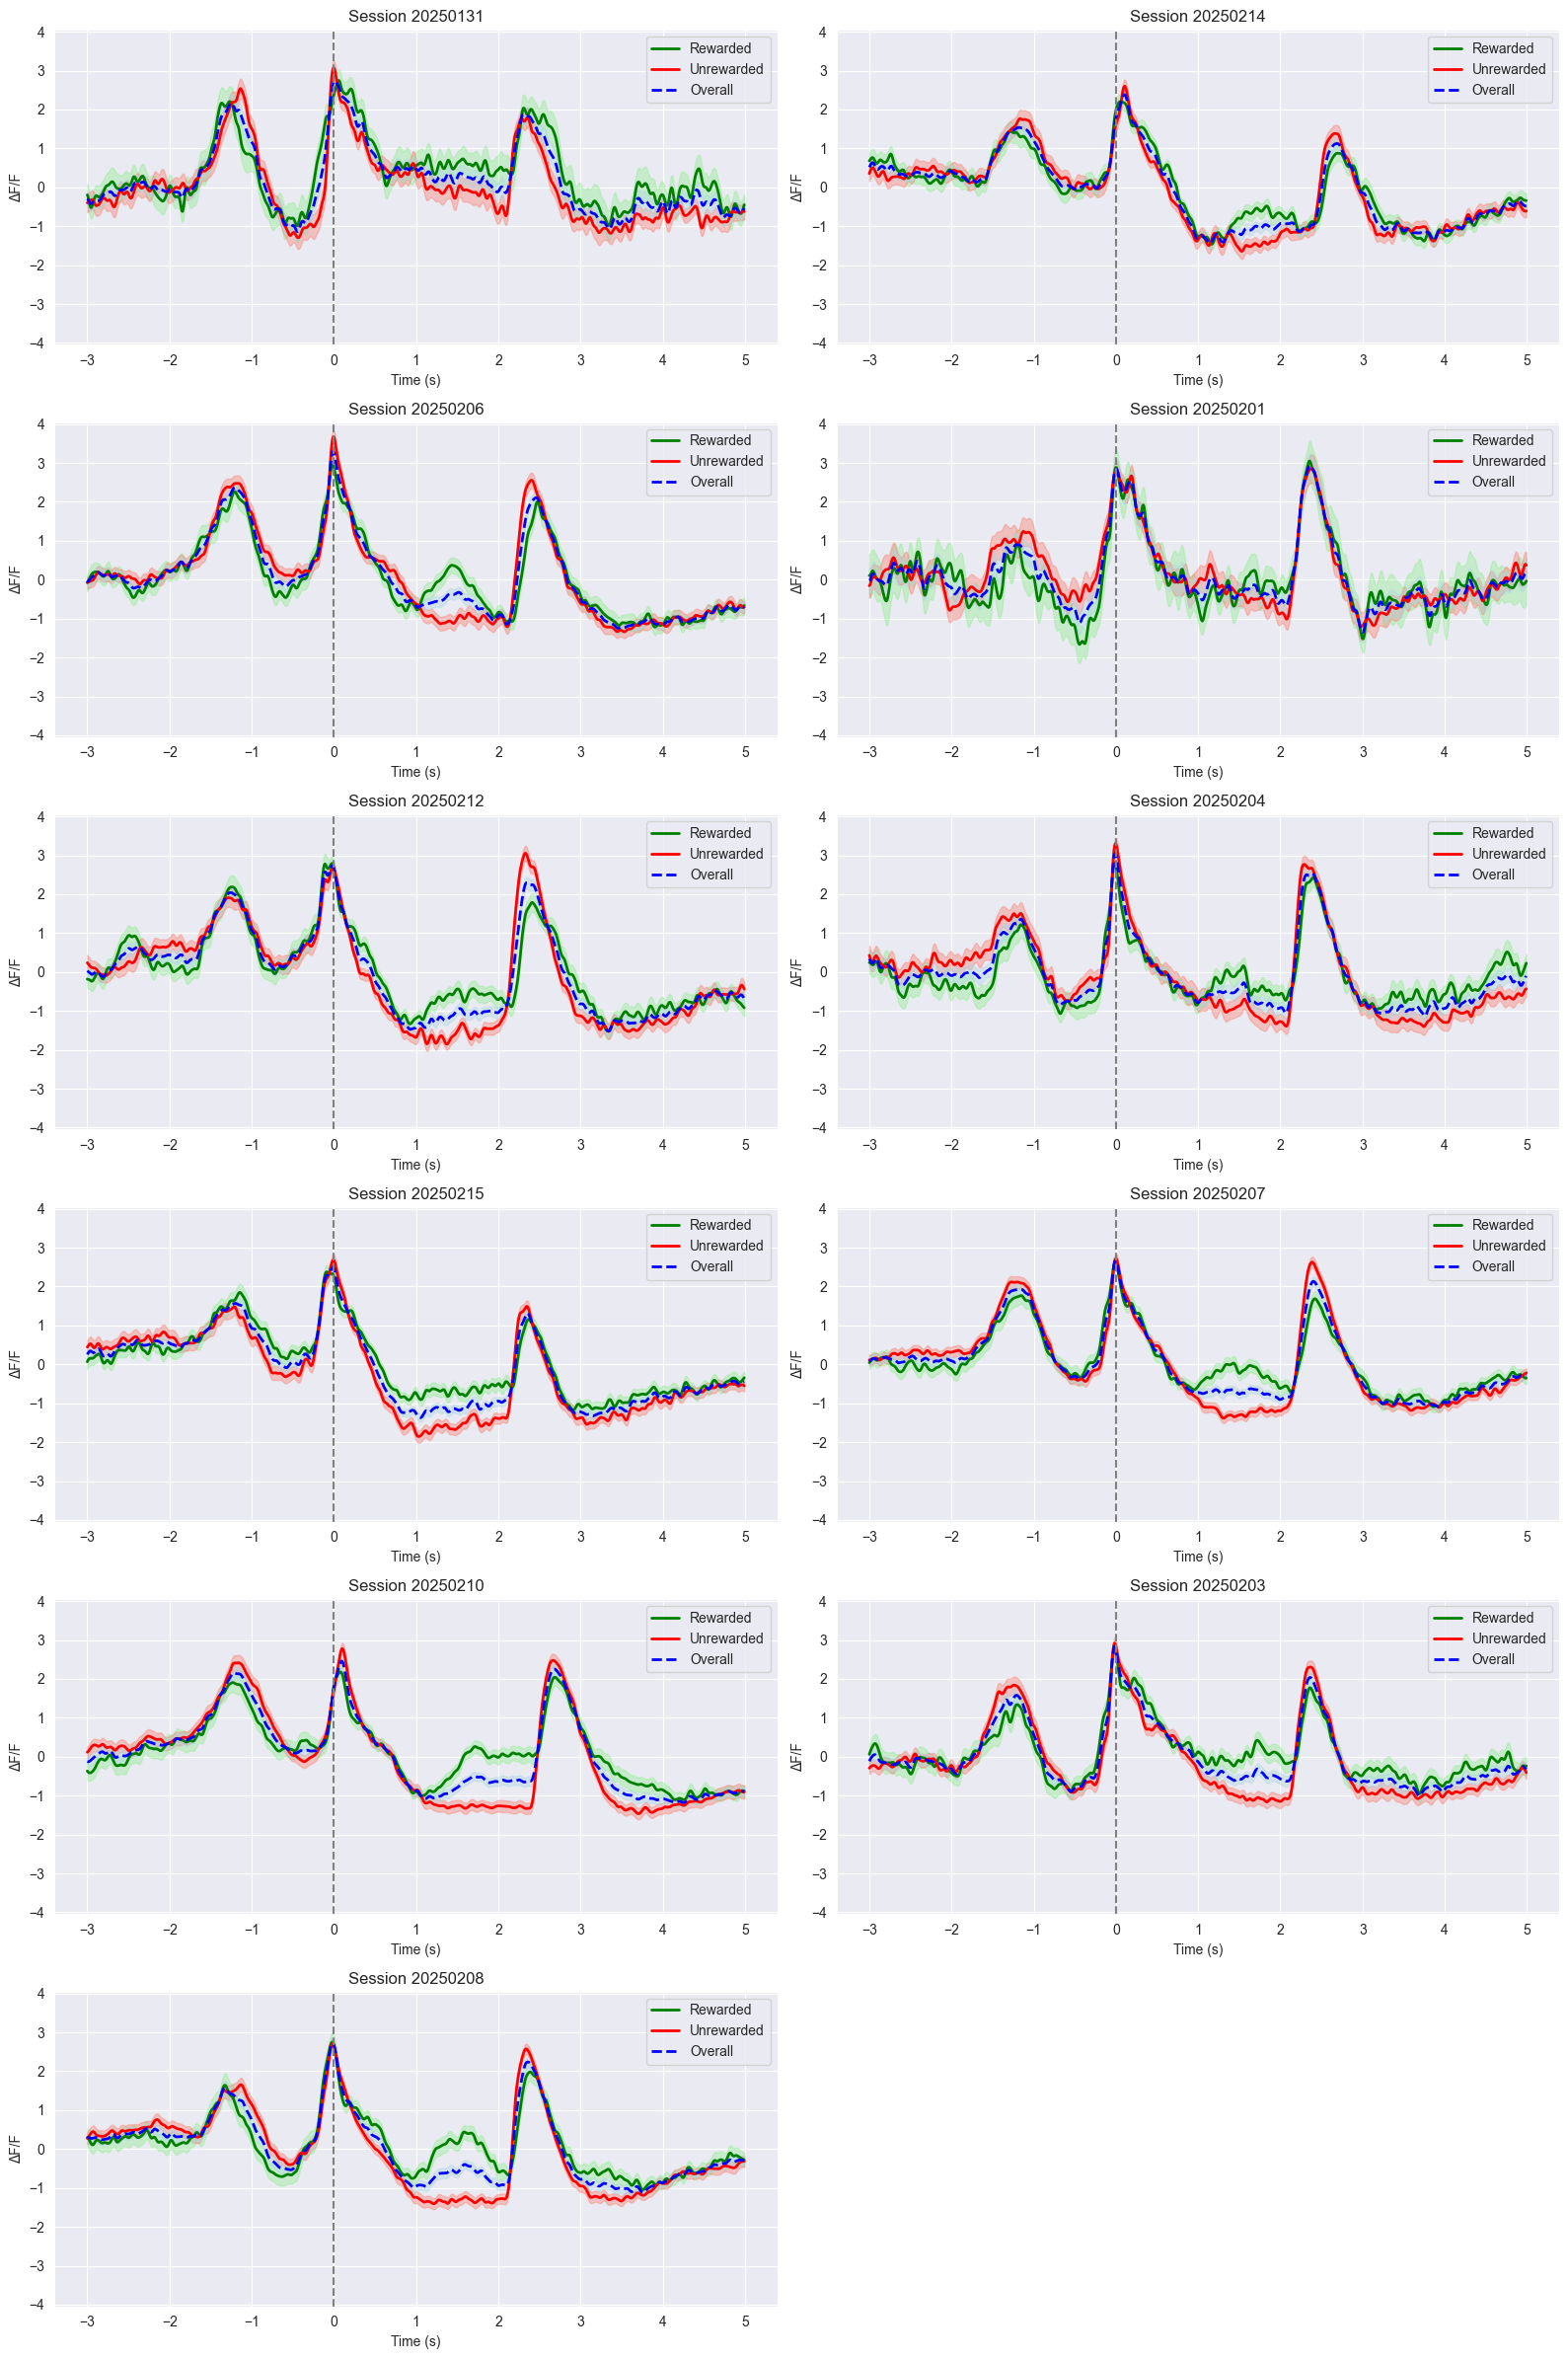

{}

In [14]:
plot_per_session_win_loss("JOA-M-0022")